In [45]:
import pandas as pd
import numpy as np

In [46]:
file_path = "./data/04_(문제)_회귀모델_drinking_water.csv"
df = pd.read_csv(file_path)
df.head()

,친밀도,적절성,만족도
0,3,4,3
1,3,3,2
2,4,4,4
3,2,2,2
4,2,2,2


In [47]:
x = df[["친밀도", "적절성"]]
y = df["만족도"]

In [48]:
### 데이터프레임을 2차원으로 바꾸기
# 데이터프레임은 2차원
# to_numpy()
dw_x = x.to_numpy()
dw_x

array([[3, 4],
       [3, 3],
       [4, 4],
       [2, 2],
       [2, 2],
       [3, 3],
       [4, 4],
       [2, 2],
       [3, 2],
       [4, 2],
       [5, 5],
       [4, 4],
       [1, 1],
       [3, 2],
       [2, 2],
       [2, 2],
       [3, 3],
       [2, 3],
       [3, 3],
       [4, 4],
       [3, 2],
       [3, 4],
       [2, 3],
       [4, 4],
       [4, 3],
       [3, 2],
       [2, 3],
       [4, 3],
       [3, 2],
       [3, 2],
       [3, 3],
       [2, 3],
       [3, 4],
       [3, 2],
       [3, 4],
       [3, 1],
       [2, 3],
       [3, 3],
       [4, 4],
       [3, 3],
       [3, 3],
       [3, 3],
       [2, 3],
       [3, 2],
       [3, 3],
       [3, 4],
       [4, 3],
       [3, 3],
       [3, 3],
       [3, 2],
       [2, 3],
       [4, 3],
       [3, 3],
       [3, 3],
       [2, 1],
       [4, 3],
       [3, 4],
       [3, 4],
       [4, 5],
       [3, 3],
       [2, 3],
       [4, 4],
       [3, 3],
       [3, 3],
       [3, 3],
       [3, 3],
       [3,

In [49]:
# 종속변수
dw_y = y.to_numpy()
dw_y

array([3, 2, 4, 2, 2, 3, 4, 2, 3, 3, 5, 5, 1, 2, 2, 2, 3, 3, 3, 4, 3, 4,
       3, 4, 3, 3, 3, 3, 2, 3, 2, 3, 4, 2, 4, 1, 3, 3, 4, 3, 3, 3, 3, 1,
       2, 3, 4, 3, 2, 2, 2, 4, 3, 3, 1, 3, 3, 3, 5, 3, 3, 4, 3, 3, 3, 3,
       3, 3, 4, 3, 3, 3, 3, 3, 3, 3, 2, 1, 4, 3, 4, 4, 2, 3, 4, 4, 4, 3,
       2, 4, 3, 4, 4, 3, 4, 2, 3, 4, 4, 4, 4, 3, 4, 3, 2, 4, 3, 2, 3, 4,
       3, 2, 4, 4, 3, 2, 2, 3, 3, 5, 2, 3, 2, 1, 3, 2, 4, 4, 4, 4, 3, 3,
       5, 3, 3, 4, 3, 4, 3, 3, 3, 4, 3, 3, 4, 3, 3, 4, 3, 2, 1, 3, 3, 3,
       4, 3, 3, 4, 4, 4, 3, 3, 3, 3, 3, 3, 2, 2, 3, 2, 3, 3, 3, 3, 3, 3,
       3, 2, 4, 4, 2, 2, 3, 3, 3, 3, 3, 2, 4, 3, 3, 3, 3, 3, 2, 3, 3, 3,
       3, 4, 4, 3, 4, 4, 2, 2, 2, 4, 2, 5, 1, 3, 3, 4, 4, 3, 4, 4, 4, 3,
       2, 4, 3, 1, 4, 3, 3, 4, 3, 3, 4, 4, 3, 4, 3, 2, 4, 3, 4, 3, 2, 3,
       3, 4, 4, 2, 5, 3, 4, 3, 3, 4, 4, 2, 4, 3, 3, 3, 2, 4, 3, 4, 4, 3],
      dtype=int64)

In [50]:
### 1. 훈련데이터와 테스트데이터 분리하기
from sklearn.model_selection import train_test_split

### 훈련데이터/ 테스트데이터 세트 생성하기
train_input, test_input, train_target, test_target = \
    train_test_split(dw_x, dw_y, random_state=42)
    
print(train_input.shape)
print(train_target.shape)
print(test_input.shape)
print(test_target.shape)

(198, 2)
(198,)
(66, 2)
(66,)


In [51]:
### 사이킷런 변환기 클래스
from sklearn.preprocessing import PolynomialFeatures

In [52]:
### train_input, test_input 데이터 변환하기
# 변수명 : train_poly, test_poly 사용

### 객체생성(모델)
poly = PolynomialFeatures(include_bias=False)

### 훈련시키기 : 새롭게 만들 스스로 특성 조합 찾기
poly.fit(train_input)

### 찾은 특성 조합으로 데이터 변환하기
# - 훈련데이터 변환하기
train_poly = poly.transform(train_input)

# - 테스트데이터 변환하기
test_poly = poly.transform(test_input)

print(train_poly.shape, test_poly.shape)

### 훈련데이터와 테스트데이터 결정값 확인까지 

from sklearn.linear_model import LinearRegression
lr = LinearRegression()

lr.fit(train_poly, train_target)
print("훈련 = ", lr.score(train_poly, train_target))
print("테스트 = ", lr.score(test_poly, test_target))

(198, 5) (66, 5)
훈련 =  0.6424006605798991
테스트 =  0.6337634370221501


In [53]:
### train_input, test_input 데이터 변환하기
# 변수명 : train_poly, test_poly 사용

### 객체생성(모델)
poly = PolynomialFeatures(degree = 5, include_bias=False)

### 훈련시키기 : 새롭게 만들 스스로 특성 조합 찾기
poly.fit(train_input)

### 찾은 특성 조합으로 데이터 변환하기
# - 훈련데이터 변환하기
train_poly = poly.transform(train_input)

# - 테스트데이터 변환하기
test_poly = poly.transform(test_input)

print(train_poly.shape, test_poly.shape)

### 훈련데이터와 테스트데이터 결정값 확인까지 

from sklearn.linear_model import LinearRegression
lr = LinearRegression()

lr.fit(train_poly, train_target)
print("훈련 = ", lr.score(train_poly, train_target))
print("테스트 = ", lr.score(test_poly, test_target))

(198, 20) (66, 20)
훈련 =  0.6686865960782669
테스트 =  -1.0195702935597044


In [54]:
### 정규화(또는 표준화)

### 사용패키지
from sklearn.preprocessing import StandardScaler

In [55]:
### 클래스(모델) 생성하기
ss = StandardScaler()
### 스스로 표준점수를 만들어냅니다.
ss.fit(train_poly, train_target)

StandardScaler()

In [56]:
### 훈련데이터 표준점수로 변환하기
train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)

# 평균 및 표준편차 확인하기
print(ss.mean_, ss.scale_)

[  2.91919192   3.14141414   9.41414141   9.57575758  10.61616162
  32.31313131  32.09090909  33.52525253  37.92929293 116.2020202
 114.18181818 116.26262626 123.66666667 141.76767677 434.73737374
 425.06060606 427.46464646 442.66666667 476.49494949 550.41414141] [  0.94470099   0.86468422   5.2512819    4.95656061   5.39117699
  25.31863468  24.7437742   25.16163644  27.74095631 119.60524125
 117.854504   119.39566561 123.80128261 136.03942004 566.46493889
 560.25815331 564.66090321 578.77571937 604.3252498  660.14808578]


In [57]:
from sklearn.linear_model import Ridge

### 객체(모델) 생성
ridge = Ridge()

### 훈련모델 생성
ridge.fit(train_scaled, train_target)

### 훈련데이터 결정계수
print("훈련 = ", ridge.score(train_scaled, train_target))

### 테스트데이터 결정계수
print("테스트 = ", ridge.score(test_scaled, test_target))


훈련 =  0.6428834595890403
테스트 =  0.6342200586076746


In [58]:
from sklearn.linear_model import Lasso

### 객체(모델) 생성
lasso = Lasso()

### 훈련모델 생성
lasso.fit(train_scaled, train_target)

### 훈련데이터 결정계수
print("훈련 = ", lasso.score(train_scaled, train_target))

### 테스트데이터 결정계수
print("테스트 = ", lasso.score(test_scaled, test_target))

훈련 =  0.0
테스트 =  -0.03759780907668264


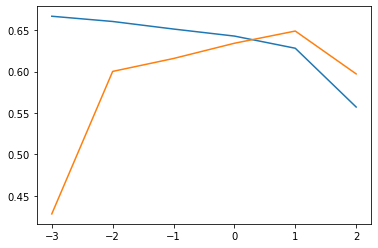

In [59]:
### alpha 강도 조절값 찾아보기
import matplotlib.pyplot as plt

# 훈련 시 발생하는 결정계수를 저장할 리스트
train_score = []
# 테스트 시 발생하는 결정계수를 저장할 리스트 
test_score = []

# 임의 alpha 값(x축으로 설정합니다.) 설정(범위 설정)
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]

### 훈련 및 테스트 결정계수 데이터 조회하기
for alpha in alpha_list :
    # 릿지 모델
    ridge = Ridge(alpha=alpha)
    ridge.fit(train_scaled, train_target)
    train_score.append(ridge.score(train_scaled, train_target))
    test_score.append(ridge.score(test_scaled, test_target))
    
### 그래프로 시각화
# - log10 : 지수로 표현
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.show()

In [60]:
# 릿지 모델
ridge = Ridge(alpha=0.1)
ridge.fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target))
print(ridge.score(test_scaled, test_target))

0.6513797753798272
0.6158302545734384


c:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.100e-01, tolerance: 1.364e-02
  model = cd_fast.enet_coordinate_descent(


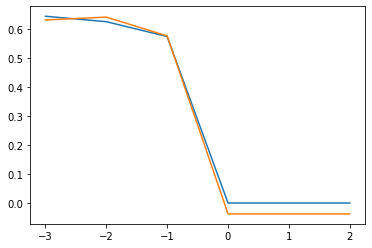

In [61]:
# 훈련 시 발생하는 결정계수를 저장할 리스트
train_score = []
# 테스트 시 발생하는 결정계수를 저장할 리스트 
test_score = []

# 임의 alpha 값(x축으로 설정합니다.) 설정(범위 설정)
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]

### 훈련 및 테스트 결정계수 데이터 조회하기
for alpha in alpha_list :
    # 라쏘 모델
    lasso = Lasso(alpha=alpha)
    lasso.fit(train_scaled, train_target)
    train_score.append(lasso.score(train_scaled, train_target))
    test_score.append(lasso.score(test_scaled, test_target))
    
### 그래프로 시각화
# - log10 : 지수로 표현
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.show()

In [62]:
# 라쏘 모델
lasso = Lasso(alpha = 0.001)
lasso.fit(train_scaled, train_target)
print(lasso.score(train_scaled, train_target))
print(lasso.score(test_scaled, test_target))

0.6447980298364199
0.632062293175824


c:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.100e-01, tolerance: 1.364e-02
  model = cd_fast.enet_coordinate_descent(


In [66]:
### (해석)
print("다중 훈련 = ", lr.score(train_poly, train_target))
print("다중 테스트 = ", lr.score(test_poly, test_target))
print("릿지 훈련 = ", ridge.score(train_scaled, train_target))
print("릿지 테스트 = ", ridge.score(test_poly, test_target))
print("라쏘 훈련 = ", lasso.score(train_scaled, train_target))
print("라쏘 테스트 = ", lasso.score(test_poly, test_target))
# 적합한 모델을 찾아보았지만 적합한 것이 발견되지 않았습니다.
# 데이터는 모두 과소적합이 나왔습니다.
# 따라서 더 나은 데이터를 찾아야합니다

다중 훈련 =  0.6686865960782669
다중 테스트 =  -1.0195702935597044
릿지 훈련 =  0.6513797753798272
릿지 테스트 =  -568878.1129432657
라쏘 훈련 =  0.6447980298364199
라쏘 테스트 =  -35237.54545904275
